In [46]:
import pandas as pd

In [47]:
import requests
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url1 = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?sort=TimeStamp:desc&from=0&size=100&q=*'
url2 = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?sort=TimeStamp:desc&from=100&size=100&q=*'

In [48]:
response1 = requests.get(url=url1, auth=auth)


In [49]:
response2 = requests.get(url=url2, auth=auth)

In [50]:
print(response1)
print(response2)

<Response [200]>
<Response [200]>


In [51]:
import json
data1 = json.loads(response1.text)
data2 = json.loads(response2.text)

In [52]:
data1

{'took': 102,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'fEHs438Bwa_bL2zRg4FR',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 2,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648796400000,
     'Measurement': 'µg/m3'},
    'sort': [1648796400000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'fUHs438Bwa_bL2zRg4FU',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 3,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648796400000,
     'Measurement': 'µg/m3'},
    'sort': [1648796400000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'fkHs438Bwa_bL2zRg4Fi',
    '_score': None,
    '_source': {'Source': 

In [53]:
data2

{'took': 153,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': '1kG1438Bwa_bL2zRlICE',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 4,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648792800000,
     'Measurement': 'µg/m3'},
    'sort': [1648792800000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': '2EG1438Bwa_bL2zRlICP',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 6,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648792800000,
     'Measurement': 'µg/m3'},
    'sort': [1648792800000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'TUG1438Bwa_bL2zRnYGX',
    '_score': None,
    '_source': {'Source': 

In [54]:
from pandas import json_normalize
dataframe1 = json_normalize(data1['hits']['hits'])
dataframe2 = json_normalize(data2['hits']['hits'])

In [55]:
dataframe1

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,fEHs438Bwa_bL2zRg4FR,None,[1648796400000],UradMonitor,pm25,2.0,45.589267,25.464450,1648796400000,µg/m3
1,brasov-dev,_doc,fUHs438Bwa_bL2zRg4FU,None,[1648796400000],UradMonitor,pm10,3.0,45.589267,25.464450,1648796400000,µg/m3
2,brasov-dev,_doc,fkHs438Bwa_bL2zRg4Fi,None,[1648796400000],UradMonitor,pm1,1.0,45.589267,25.464450,1648796400000,µg/m3
3,brasov-dev,_doc,80Hs438Bwa_bL2zRiIED,None,[1648796400000],Waqi,o3,27.5,45.649117,25.604136,1648796400000,µg/m3
4,brasov-dev,_doc,9UHs438Bwa_bL2zRiIEF,None,[1648796400000],Waqi,pm10,15.0,45.649117,25.604136,1648796400000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,brasov-dev,_doc,2UHs438Bwa_bL2zRhoFF,None,[1648796315000],UradMonitor,pm10,0.0,45.665184,25.558891,1648796315000,µg/m3
96,brasov-dev,_doc,nEHs438Bwa_bL2zRhIGo,None,[1648796309000],UradMonitor,pm10,1.0,45.657861,25.621916,1648796309000,µg/m3
97,brasov-dev,_doc,nkHs438Bwa_bL2zRhIGq,None,[1648796309000],UradMonitor,pm25,8.0,45.657861,25.621916,1648796309000,µg/m3
98,brasov-dev,_doc,5kHs438Bwa_bL2zRhoFb,None,[1648796309000],UradMonitor,pm1,0.0,45.657861,25.621916,1648796309000,µg/m3


In [56]:
dataframe2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,1kG1438Bwa_bL2zRlICE,None,[1648792800000],UradMonitor,pm25,4.0,45.589267,25.464450,1648792800000,µg/m3
1,brasov-dev,_doc,2EG1438Bwa_bL2zRlICP,None,[1648792800000],UradMonitor,pm10,6.0,45.589267,25.464450,1648792800000,µg/m3
2,brasov-dev,_doc,TUG1438Bwa_bL2zRnYGX,None,[1648792800000],Waqi,no2,26.4,45.659833,25.614488,1648792800000,µg/m3
3,brasov-dev,_doc,P0G1438Bwa_bL2zRmoGX,None,[1648792800000],Waqi,o3,31.6,45.649117,25.604136,1648792800000,µg/m3
4,brasov-dev,_doc,QEG1438Bwa_bL2zRmoGY,None,[1648792800000],Waqi,pm10,15.0,45.649117,25.604136,1648792800000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,brasov-dev,_doc,_EG1438Bwa_bL2zRlYC4,None,[1648792709000],UradMonitor,pm25,7.0,45.657861,25.621916,1648792709000,µg/m3
96,brasov-dev,_doc,_kG1438Bwa_bL2zRlYDS,None,[1648792709000],UradMonitor,pm1,0.0,45.657861,25.621916,1648792709000,µg/m3
97,brasov-dev,_doc,AkG1438Bwa_bL2zRlYHk,None,[1648792709000],UradMonitor,pm10,1.0,45.657861,25.621916,1648792709000,µg/m3
98,brasov-dev,_doc,DEF-438Bwa_bL2zRoYCb,None,[1648789200000],UradMonitor,pm1,3.0,45.589267,25.464450,1648789200000,µg/m3


In [58]:
dataframes = [dataframe1, dataframe2]
df_concat = pd.concat(dataframes)
df_concat

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,fEHs438Bwa_bL2zRg4FR,None,[1648796400000],UradMonitor,pm25,2.0,45.589267,25.464450,1648796400000,µg/m3
1,brasov-dev,_doc,fUHs438Bwa_bL2zRg4FU,None,[1648796400000],UradMonitor,pm10,3.0,45.589267,25.464450,1648796400000,µg/m3
2,brasov-dev,_doc,fkHs438Bwa_bL2zRg4Fi,None,[1648796400000],UradMonitor,pm1,1.0,45.589267,25.464450,1648796400000,µg/m3
3,brasov-dev,_doc,80Hs438Bwa_bL2zRiIED,None,[1648796400000],Waqi,o3,27.5,45.649117,25.604136,1648796400000,µg/m3
4,brasov-dev,_doc,9UHs438Bwa_bL2zRiIEF,None,[1648796400000],Waqi,pm10,15.0,45.649117,25.604136,1648796400000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,brasov-dev,_doc,_EG1438Bwa_bL2zRlYC4,None,[1648792709000],UradMonitor,pm25,7.0,45.657861,25.621916,1648792709000,µg/m3
96,brasov-dev,_doc,_kG1438Bwa_bL2zRlYDS,None,[1648792709000],UradMonitor,pm1,0.0,45.657861,25.621916,1648792709000,µg/m3
97,brasov-dev,_doc,AkG1438Bwa_bL2zRlYHk,None,[1648792709000],UradMonitor,pm10,1.0,45.657861,25.621916,1648792709000,µg/m3
98,brasov-dev,_doc,DEF-438Bwa_bL2zRoYCb,None,[1648789200000],UradMonitor,pm1,3.0,45.589267,25.464450,1648789200000,µg/m3


<AxesSubplot:>

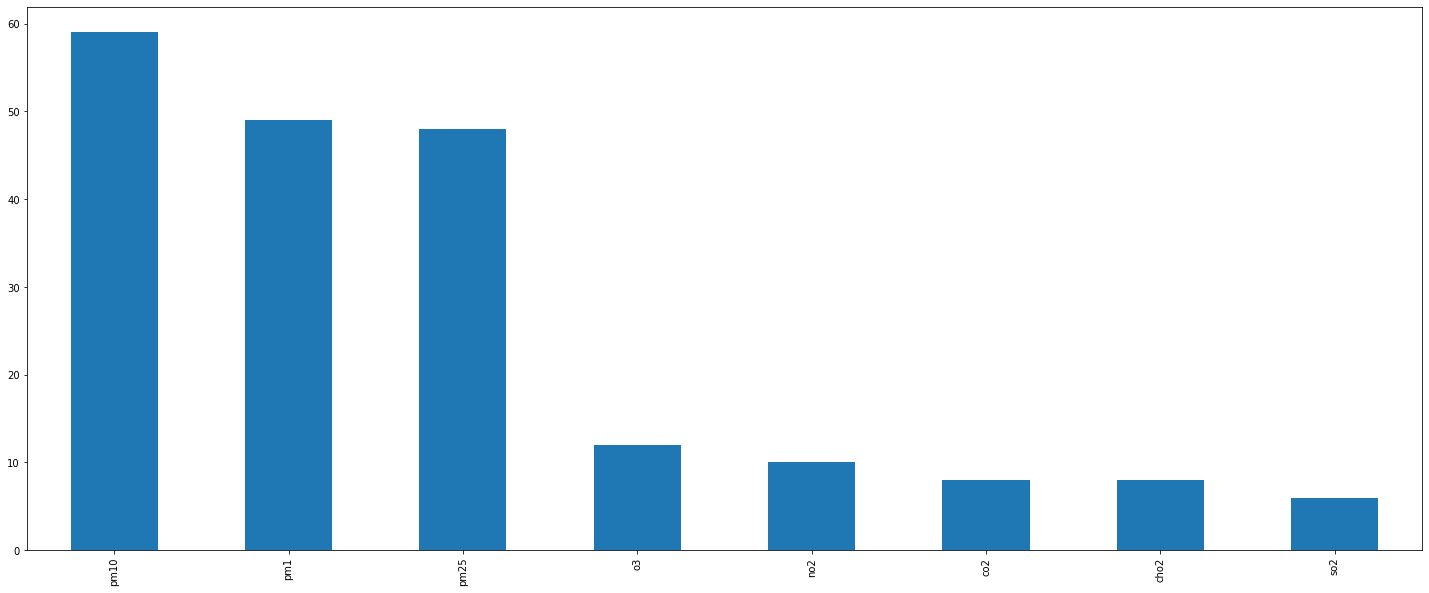

In [59]:
import matplotlib.pyplot as plt
hist_sensor = plt.figure(figsize = (25,10))
ax = hist_sensor.gca()

df_concat.get('_source.Sensor').value_counts().plot(kind='bar')

In [60]:
df_concat['LocationId'] = df_concat['_source.LocationLat']*10000000 + df_concat['_source.LocationLong']*10000000
df_concat['LocationName'] = ""
df_concat.loc[df_concat['LocationId'] == 712668900.0, 'LocationName'] = 'AFI' 
df_concat.loc[df_concat['LocationId'] == 712196290.0, 'LocationName'] = 'Bartolomeu1'
df_concat.loc[df_concat['LocationId'] == 712209000.0, 'LocationName'] = 'Bartolomeu2'
df_concat.loc[df_concat['LocationId'] == 712240750.0, 'LocationName'] = 'Bartolomeu3'
df_concat.loc[df_concat['LocationId'] == 708361730.0, 'LocationName'] = 'Bucegi'
df_concat.loc[df_concat['LocationId'] == 712682018.0, 'LocationName'] = 'Carrefour'
df_concat.loc[df_concat['LocationId'] == 712307300.0, 'LocationName'] = 'Centru1'
df_concat.loc[df_concat['LocationId'] == 712422000.0, 'LocationName'] = 'Centru2'
df_concat.loc[df_concat['LocationId'] == 712485560.0, 'LocationName'] = 'Centru3'
df_concat.loc[df_concat['LocationId'] == 712532529.0, 'LocationName'] = 'Centru4'
df_concat.loc[df_concat['LocationId'] == 711435090.0, 'LocationName'] = 'Codlea1'
df_concat.loc[df_concat['LocationId'] == 711587690.0, 'LocationName'] = 'Codlea2'
df_concat.loc[df_concat['LocationId'] == 712526000.0, 'LocationName'] = 'Colina1'
df_concat.loc[df_concat['LocationId'] == 712485000.0, 'LocationName'] = 'Colina2'
df_concat.loc[df_concat['LocationId'] == 711054930.0, 'LocationName'] = 'Cristian'
df_concat.loc[df_concat['LocationId'] == 712743216.0, 'LocationName'] = 'Gara'
df_concat.loc[df_concat['LocationId'] == 713825580.0, 'LocationName'] = 'Harman1'
df_concat.loc[df_concat['LocationId'] == 714030800.0, 'LocationName'] = 'Harman2'
df_concat.loc[df_concat['LocationId'] == 712560910.0, 'LocationName'] = 'Racadau'
df_concat.loc[df_concat['LocationId'] == 710537170.0, 'LocationName'] = 'Rasnov'
df_concat.loc[df_concat['LocationId'] == 713449870.0, 'LocationName'] = 'Sanpetru1'
df_concat.loc[df_concat['LocationId'] == 713500000.0, 'LocationName'] = 'Sanpetru2'
df_concat.loc[df_concat['LocationId'] == 712475170.0, 'LocationName'] = 'Saturn'
df_concat.loc[df_concat['LocationId'] == 712500331.0, 'LocationName'] = 'Stupini1'
df_concat.loc[df_concat['LocationId'] == 712571580.0, 'LocationName'] = 'Stupini2'
df_concat.loc[df_concat['LocationId'] == 712804610.0, 'LocationName'] = 'Tractorul'
df_concat.loc[df_concat['LocationId'] == 713218270.0, 'LocationName'] = 'TriajH'
df_concat.loc[df_concat['LocationId'] == 712783320.0, 'LocationName'] = 'Vlahuta1'
df_concat.loc[df_concat['LocationId'] == 712797770.0, 'LocationName'] = 'Vlahuta2'
df_concat.head(10)

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,brasov-dev,_doc,fEHs438Bwa_bL2zRg4FR,None,[1648796400000],UradMonitor,pm25,2.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
1,brasov-dev,_doc,fUHs438Bwa_bL2zRg4FU,None,[1648796400000],UradMonitor,pm10,3.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
2,brasov-dev,_doc,fkHs438Bwa_bL2zRg4Fi,None,[1648796400000],UradMonitor,pm1,1.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
3,brasov-dev,_doc,80Hs438Bwa_bL2zRiIED,None,[1648796400000],Waqi,o3,27.5,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
4,brasov-dev,_doc,9UHs438Bwa_bL2zRiIEF,None,[1648796400000],Waqi,pm10,15.0,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
5,brasov-dev,_doc,9kHs438Bwa_bL2zRiIEF,None,[1648796400000],Waqi,so2,2.1,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
6,brasov-dev,_doc,90Hs438Bwa_bL2zRiIH5,None,[1648796400000],Waqi,so2,1.4,45.716700,25.633300,1648796400000,µg/m3,713500000.0,Sanpetru2
7,brasov-dev,_doc,-EHs438Bwa_bL2zRiIH5,None,[1648796400000],Waqi,no2,37.5,45.634330,25.633872,1648796400000,µg/m3,712682018.0,Carrefour
8,brasov-dev,_doc,-UHs438Bwa_bL2zRiIH7,None,[1648796400000],Waqi,o3,35.8,45.716700,25.633300,1648796400000,µg/m3,713500000.0,Sanpetru2
9,brasov-dev,_doc,-kHs438Bwa_bL2zRiIH8,None,[1648796400000],Waqi,pm10,9.0,45.634330,25.633872,1648796400000,µg/m3,712682018.0,Carrefour


In [11]:
# dataframe.groupby(['LocationName']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:>

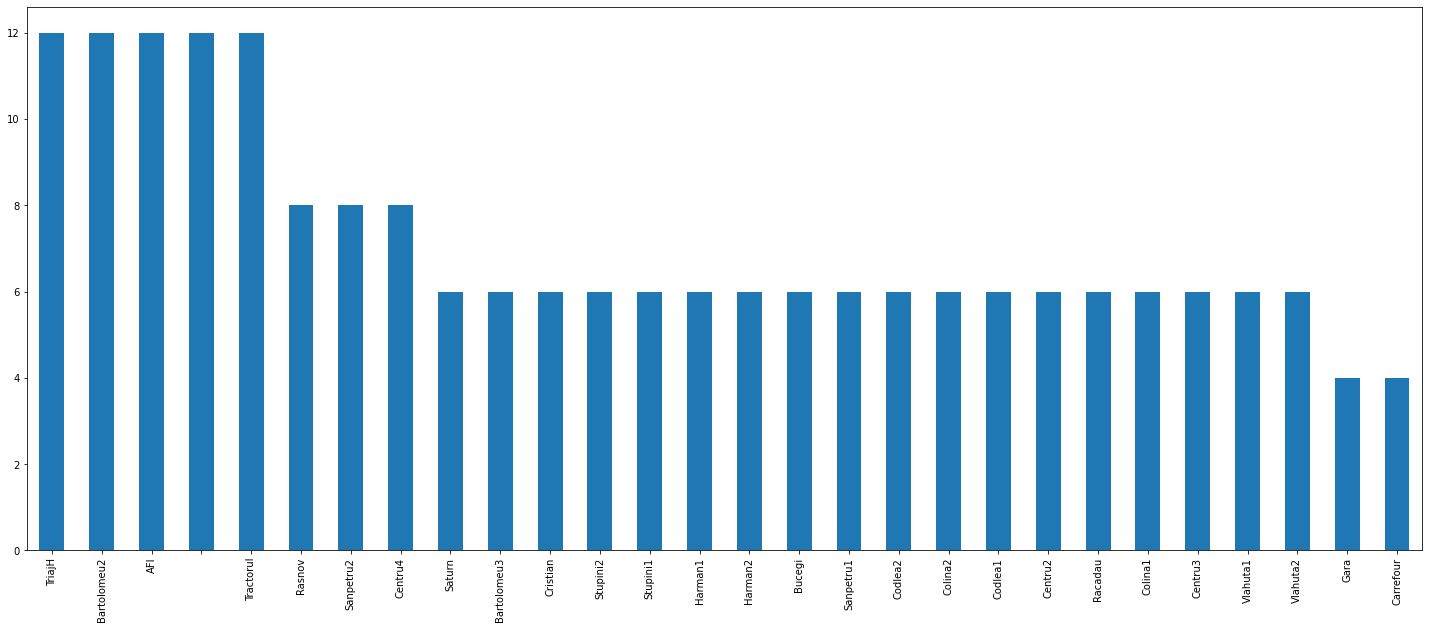

In [61]:
# hist_location = dataframe.get('LocationName').hist()
import matplotlib.pyplot as plt
hist_location = plt.figure(figsize = (25,10))
ax = hist_location.gca()
# dataframe.get('LocationName').hist(ax = ax)

df_concat.get('LocationName').value_counts().plot(kind='bar')
# dataframe.get('LocationName').value_counts(sort=False).plot.bar(rot=0)

In [62]:
dataframe_v2 = df_concat[[i for i in list(df_concat.columns) if i != '_index']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_type']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_id']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_score']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != 'sort']]
dataframe_v2.head(7)
# dataframe_v2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,UradMonitor,pm25,2.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
1,UradMonitor,pm10,3.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
2,UradMonitor,pm1,1.0,45.589267,25.464450,1648796400000,µg/m3,710537170.0,Rasnov
3,Waqi,o3,27.5,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
4,Waqi,pm10,15.0,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
5,Waqi,so2,2.1,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
6,Waqi,so2,1.4,45.716700,25.633300,1648796400000,µg/m3,713500000.0,Sanpetru2


In [63]:
cho2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'cho2']
co2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'co2']
no2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'no2']
o3 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'o3']
pm1 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm1']
pm10 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm10']
pm25 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm25']
so2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'so2']

In [64]:
print('Lungime dataframe: ',len(dataframe_v2))
print('Lungime dataframe cho2: ',len(cho2))
print('Lungime dataframe co2: ',len(co2))
print('Lungime dataframe no2: ',len(no2))
print('Lungime dataframe o3: ',len(o3))
print('Lungime dataframe pm1: ',len(pm1))
print('Lungime dataframe pm10: ',len(pm10))
print('Lungime dataframe pm25: ',len(pm25))
print('Lungime dataframe so2: ',len(so2))

Lungime dataframe:  200
Lungime dataframe cho2:  8
Lungime dataframe co2:  8
Lungime dataframe no2:  10
Lungime dataframe o3:  12
Lungime dataframe pm1:  49
Lungime dataframe pm10:  59
Lungime dataframe pm25:  48
Lungime dataframe so2:  6


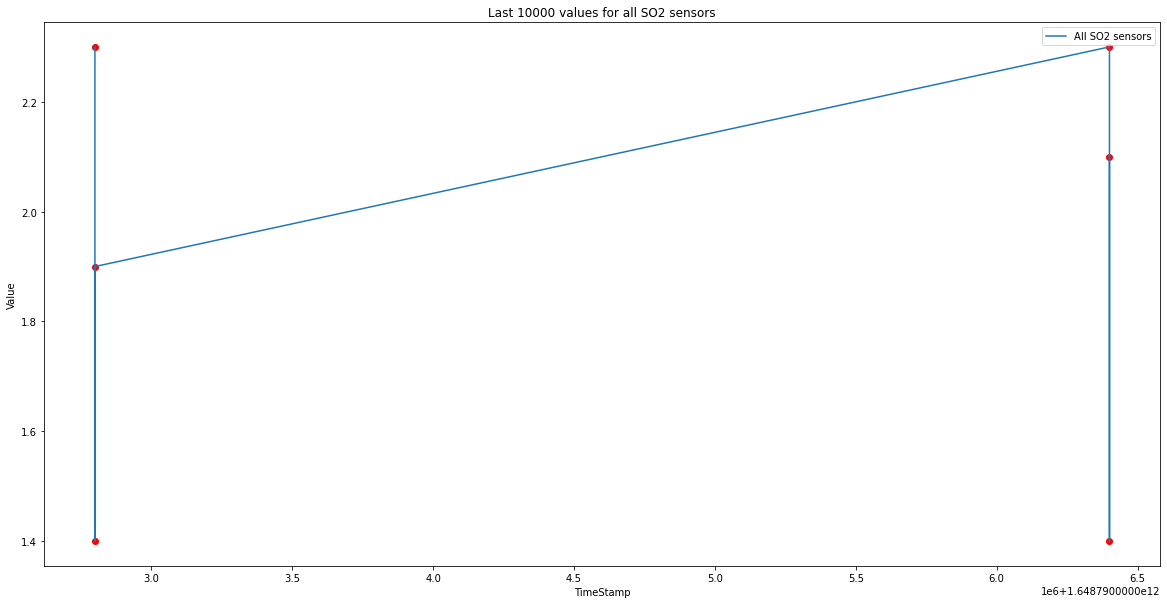

In [65]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2.get('_source.TimeStamp'), so2.get('_source.Value'), label="All SO2 sensors")
plt.scatter(so2.get('_source.TimeStamp'), so2.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for all SO2 sensors")
plt.legend()
plt.savefig('plots_updated/SO2.jpg', bbox_inches = 'tight')
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [67]:
X = so2[["_source.TimeStamp"]].values
y = so2[["_source.Value"]].values

In [68]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [69]:
y_pred = regressor.predict(X)

In [70]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  1.8518518518518525e-08
Intercept:  -30531.333333333343


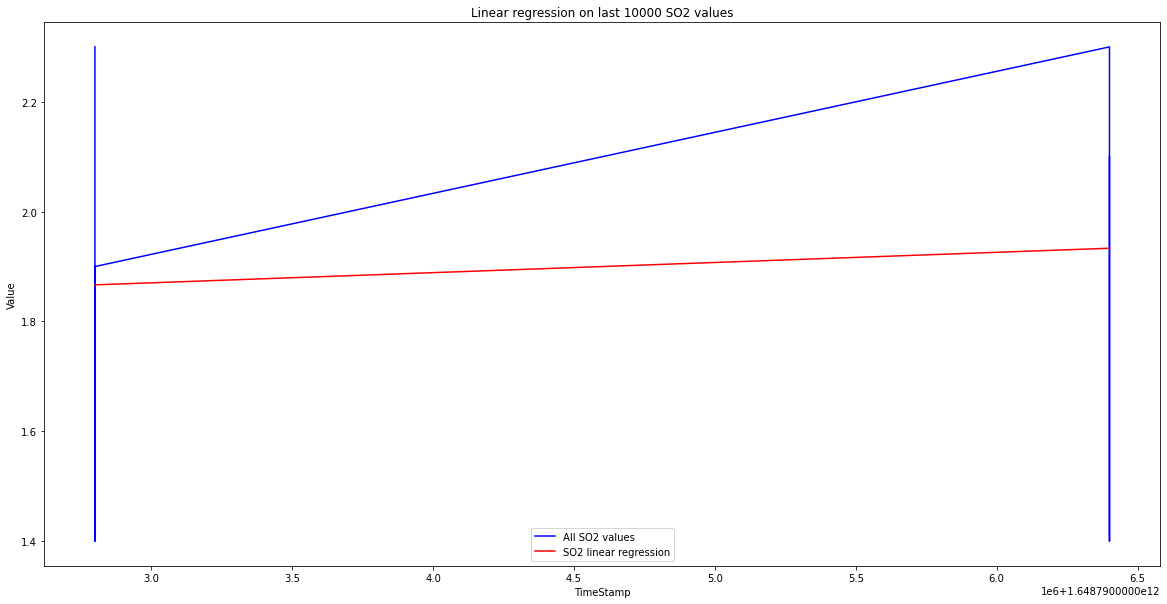

In [71]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue', label="All SO2 values")
plt.plot(X, regressor.predict(X), color = 'red', label="SO2 linear regression")
plt.title('Linear regression on last 10000 SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots_updated/SO2_regression.jpg', bbox_inches = 'tight')
plt.show()

In [72]:
so2.head(6) #Vlahuta1, Centru4, Sanpetru2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
5,Waqi,so2,2.1,45.649117,25.604136,1648796400000,µg/m3,712532529.0,Centru4
6,Waqi,so2,1.4,45.716700,25.633300,1648796400000,µg/m3,713500000.0,Sanpetru2
13,Waqi,so2,2.3,45.654271,25.624061,1648796400000,µg/m3,712783320.0,Vlahuta1
6,Waqi,so2,1.9,45.649117,25.604136,1648792800000,µg/m3,712532529.0,Centru4
7,Waqi,so2,1.4,45.716700,25.633300,1648792800000,µg/m3,713500000.0,Sanpetru2
13,Waqi,so2,2.3,45.654271,25.624061,1648792800000,µg/m3,712783320.0,Vlahuta1


In [73]:
so2_vlahuta1 = so2[so2.get('LocationName') == 'Vlahuta1']
so2_centru4 = so2[so2.get('LocationName') == 'Centru4']
so2_sanpetru2 = so2[so2.get('LocationName') == 'Sanpetru2']

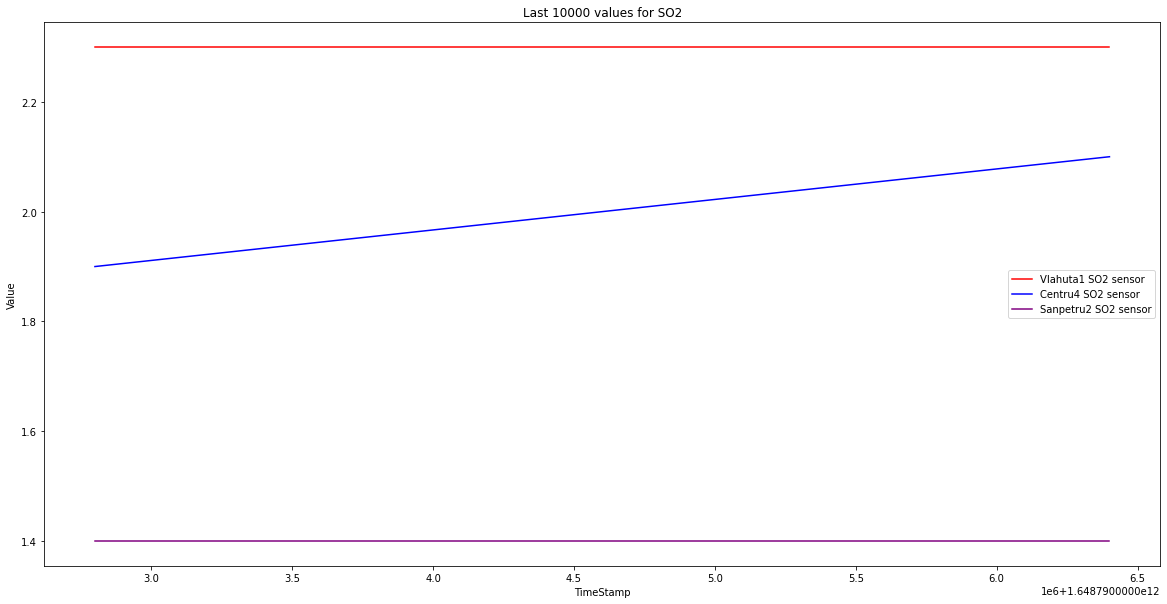

In [74]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(so2_vlahuta1.get('_source.TimeStamp'), so2_vlahuta1.get('_source.Value'), color = "red", label="Vlahuta1 SO2 sensor")
plt.plot(so2_centru4.get('_source.TimeStamp'), so2_centru4.get('_source.Value'), color = "blue", label="Centru4 SO2 sensor")
plt.plot(so2_sanpetru2.get('_source.TimeStamp'), so2_sanpetru2.get('_source.Value'), color = "purple", label="Sanpetru2 SO2 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
plt.legend()
plt.savefig('plots_updated/SO2_all.jpg', bbox_inches = 'tight')
plt.show()

In [26]:
pm10_bartolomeu1 = pm10[pm10.get('LocationName') == 'Bartolomeu1']
pm10_bartolomeu2 = pm10[pm10.get('LocationName') == 'Bartolomeu2']
pm10_bartolomeu3 = pm10[pm10.get('LocationName') == 'Bartolomeu3']

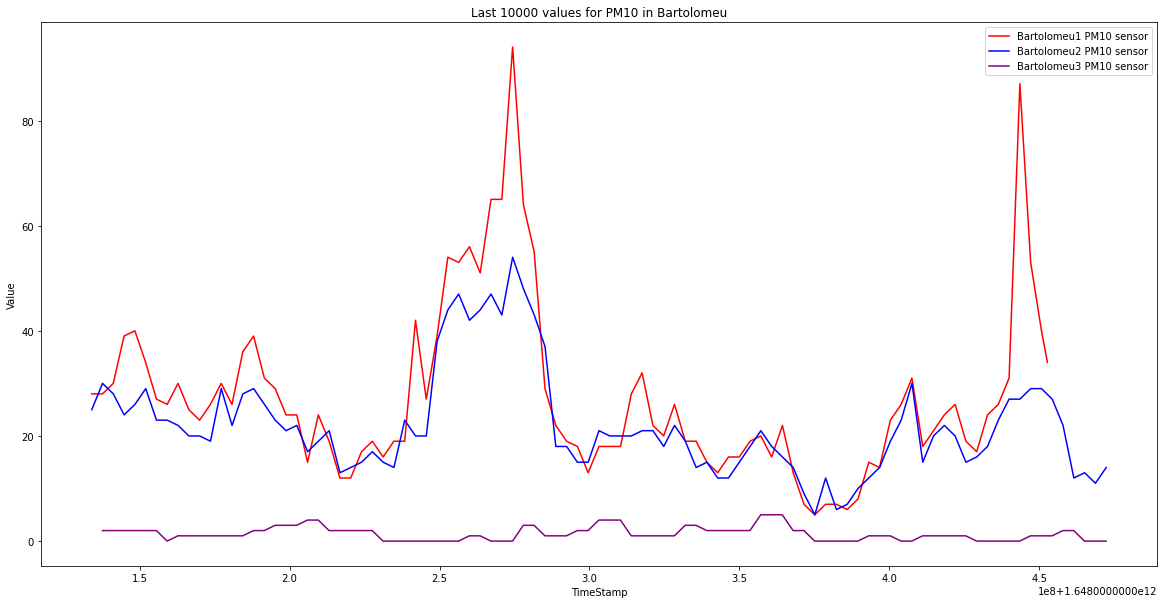

In [27]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_bartolomeu1.get('_source.TimeStamp'), pm10_bartolomeu1.get('_source.Value'), color = "red", label="Bartolomeu1 PM10 sensor")
plt.plot(pm10_bartolomeu2.get('_source.TimeStamp'), pm10_bartolomeu2.get('_source.Value'), color = "blue", label="Bartolomeu2 PM10 sensor")
plt.plot(pm10_bartolomeu3.get('_source.TimeStamp'), pm10_bartolomeu3.get('_source.Value'), color = "purple", label="Bartolomeu3 PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Bartolomeu")
plt.legend()
plt.savefig('plots_updated/PM10_Bartolomeu.jpg', bbox_inches = 'tight')
plt.show()

In [28]:
pm10_bartolomeu2.head(30)

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
37,UradMonitor,pm10,14.0,45.657148,25.563752,1648472373000,µg/m3,712209000.0,Bartolomeu2
149,UradMonitor,pm10,11.0,45.657148,25.563752,1648468773000,µg/m3,712209000.0,Bartolomeu2
256,UradMonitor,pm10,13.0,45.657148,25.563752,1648465173000,µg/m3,712209000.0,Bartolomeu2
356,UradMonitor,pm10,12.0,45.657148,25.563752,1648461573000,µg/m3,712209000.0,Bartolomeu2
454,UradMonitor,pm10,22.0,45.657148,25.563752,1648457973000,µg/m3,712209000.0,Bartolomeu2
575,UradMonitor,pm10,27.0,45.657148,25.563752,1648454373000,µg/m3,712209000.0,Bartolomeu2
677,UradMonitor,pm10,29.0,45.657148,25.563752,1648450774000,µg/m3,712209000.0,Bartolomeu2
782,UradMonitor,pm10,29.0,45.657148,25.563752,1648447173000,µg/m3,712209000.0,Bartolomeu2
884,UradMonitor,pm10,27.0,45.657148,25.563752,1648443573000,µg/m3,712209000.0,Bartolomeu2
975,UradMonitor,pm10,27.0,45.657148,25.563752,1648439974000,µg/m3,712209000.0,Bartolomeu2


In [29]:
pm10_centru1 = pm10[pm10.get('LocationName') == 'Centru1']
pm10_centru2 = pm10[pm10.get('LocationName') == 'Centru2']
pm10_centru3 = pm10[pm10.get('LocationName') == 'Centru3']
pm10_centru4 = pm10[pm10.get('LocationName') == 'Centru4']

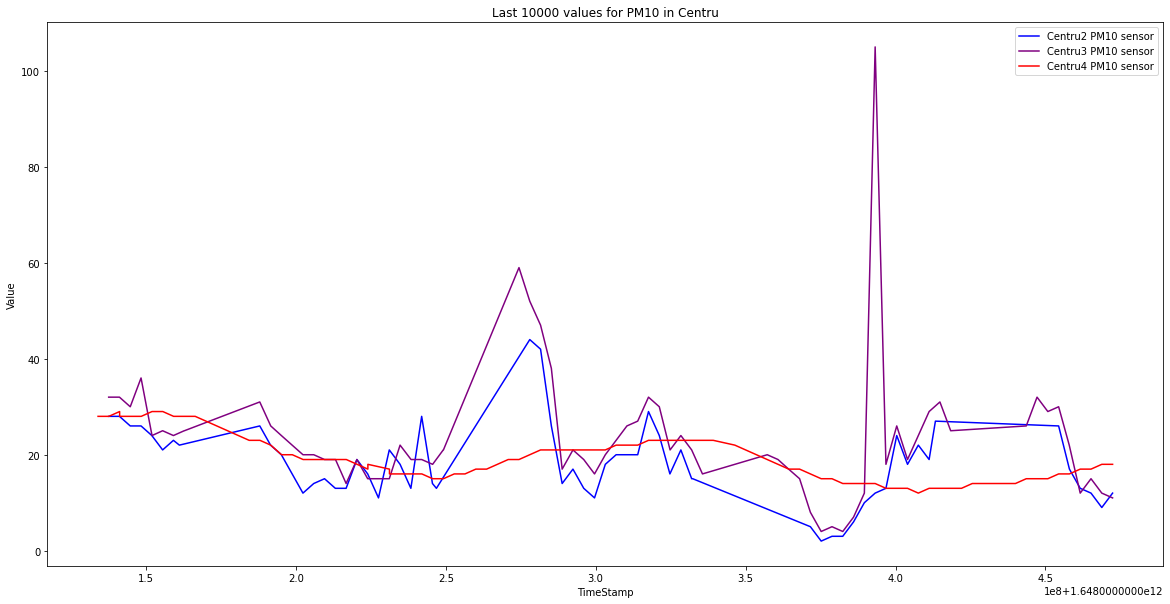

In [30]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
# plt.plot(pm10_centru1.get('_source.TimeStamp'), pm10_centru1.get('_source.Value'), color = "red")
plt.plot(pm10_centru2.get('_source.TimeStamp'), pm10_centru2.get('_source.Value'), color = "blue", label="Centru2 PM10 sensor")
plt.plot(pm10_centru3.get('_source.TimeStamp'), pm10_centru3.get('_source.Value'), color = "purple", label="Centru3 PM10 sensor")
plt.plot(pm10_centru4.get('_source.TimeStamp'), pm10_centru4.get('_source.Value'), color = "red", label="Centru4 PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Centru")
plt.legend()
plt.savefig('plots_updated/PM10_Centru.jpg', bbox_inches = 'tight')
plt.show()

In [31]:
pm10_carrefour = pm10[pm10.get('LocationName') == 'Carrefour']
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
pm10_gara = pm10[pm10.get('LocationName') == 'Gara']

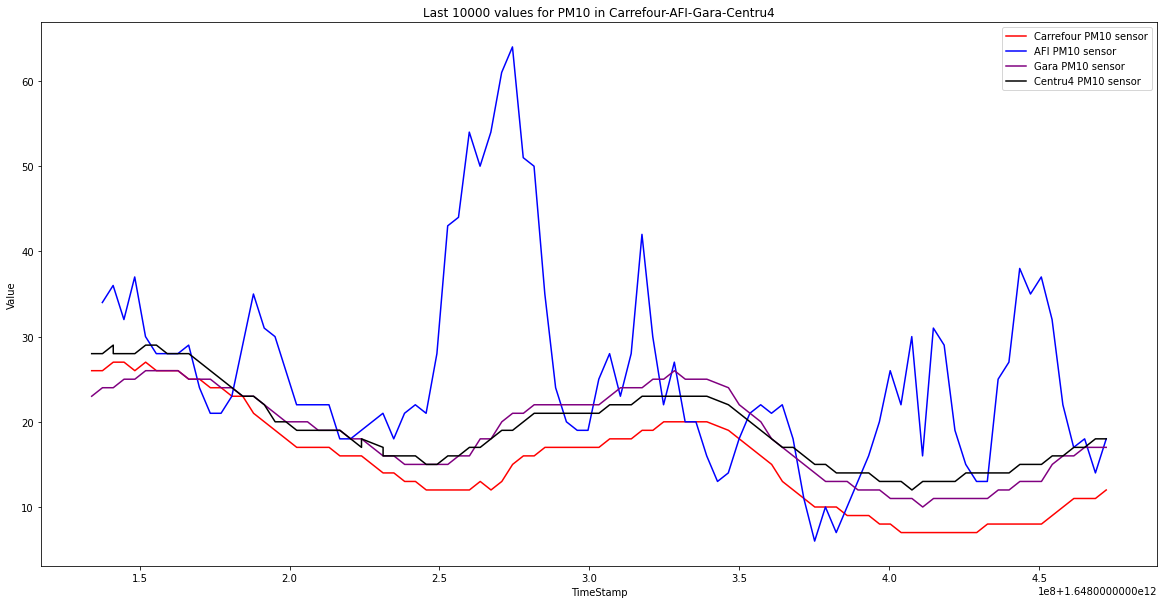

In [32]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carrefour.get('_source.TimeStamp'), pm10_carrefour.get('_source.Value'), color = "red", label="Carrefour PM10 sensor")
plt.plot(pm10_afi.get('_source.TimeStamp'), pm10_afi.get('_source.Value'), color = "blue", label="AFI PM10 sensor")
plt.plot(pm10_gara.get('_source.TimeStamp'), pm10_gara.get('_source.Value'), color = "purple", label="Gara PM10 sensor")
plt.plot(pm10_centru4.get('_source.TimeStamp'), pm10_centru4.get('_source.Value'), color = "black", label="Centru4 PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for PM10 in Carrefour-AFI-Gara-Centru4")
plt.legend()
plt.savefig('plots_updated/PM10_C-A-G-C4.jpg', bbox_inches = 'tight')
plt.show()

In [33]:
# pm10_afi.head(30)
pm10_gara.tail(10)

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
8921,Waqi,pm10,25.0,45.659833,25.614488,1648166400000,µg/m3,712743216.0,Gara
9026,Waqi,pm10,26.0,45.659833,25.614488,1648162800000,µg/m3,712743216.0,Gara
9138,Waqi,pm10,26.0,45.659833,25.614488,1648159200000,µg/m3,712743216.0,Gara
9233,Waqi,pm10,26.0,45.659833,25.614488,1648155600000,µg/m3,712743216.0,Gara
9327,Waqi,pm10,26.0,45.659833,25.614488,1648152000000,µg/m3,712743216.0,Gara
9423,Waqi,pm10,25.0,45.659833,25.614488,1648148400000,µg/m3,712743216.0,Gara
9503,Waqi,pm10,25.0,45.659833,25.614488,1648144800000,µg/m3,712743216.0,Gara
9592,Waqi,pm10,24.0,45.659833,25.614488,1648141200000,µg/m3,712743216.0,Gara
9730,Waqi,pm10,24.0,45.659833,25.614488,1648137600000,µg/m3,712743216.0,Gara
9935,Waqi,pm10,23.0,45.659833,25.614488,1648134000000,µg/m3,712743216.0,Gara


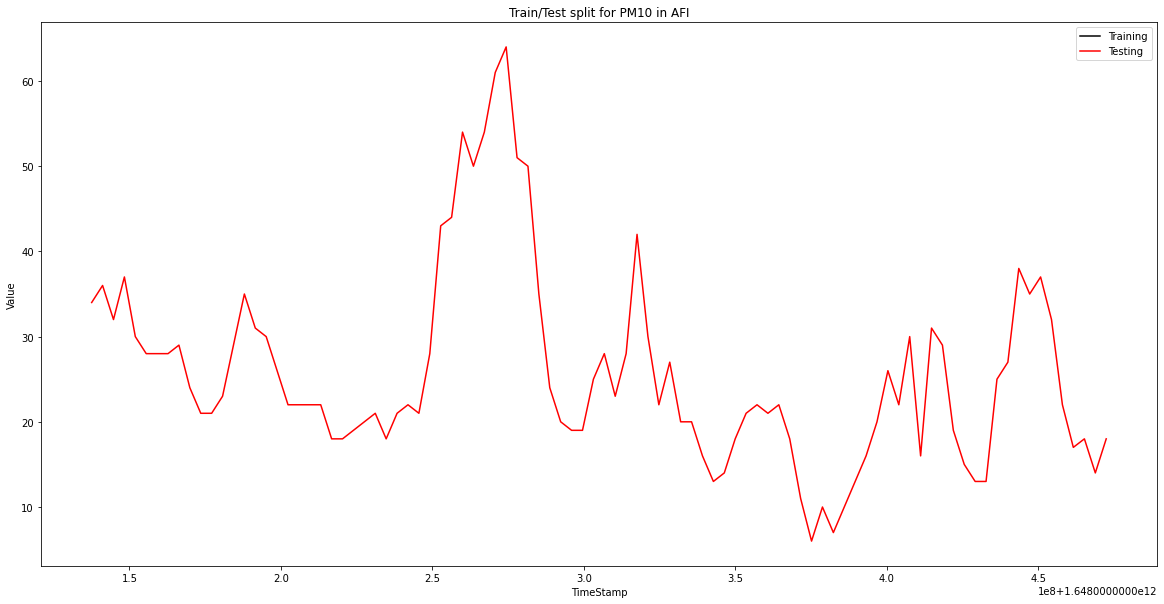

In [34]:
train = pm10_afi[pm10_afi.get('_source.TimeStamp') < 1648123156000]
test = pm10_afi[pm10_afi.get('_source.TimeStamp') >= 1648123156000]

import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.get('_source.TimeStamp'), train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.get('_source.TimeStamp'), test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Train/Test split for PM10 in AFI")
plt.legend()
plt.savefig('plots_updated/PM10_AFI_Split.jpg', bbox_inches = 'tight')
plt.show()

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


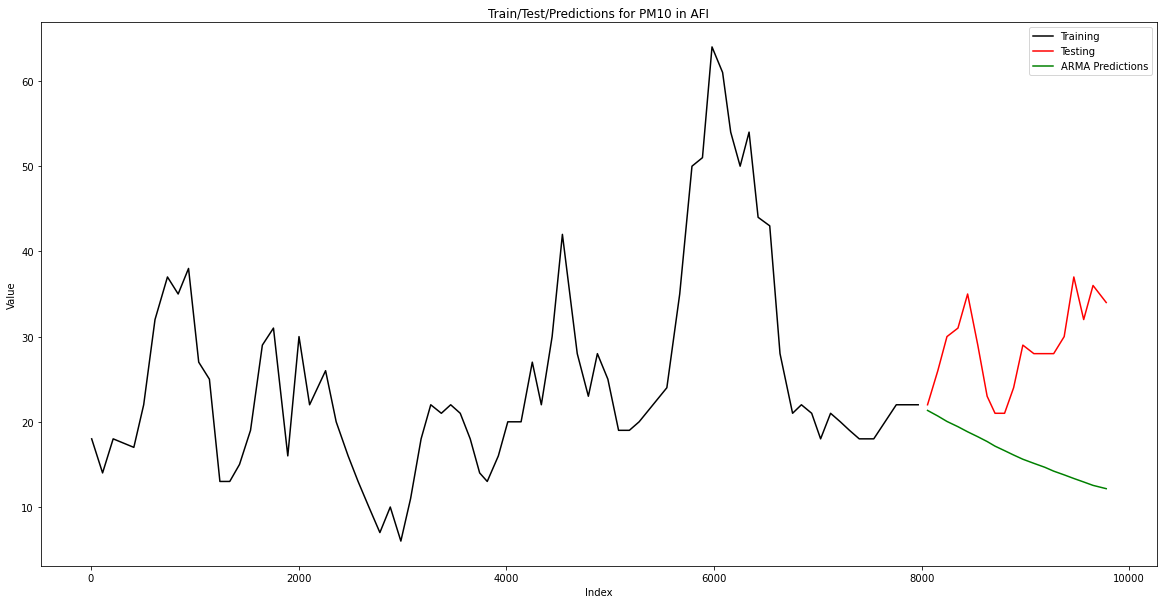

RMSE:  13.937689227210766


In [35]:
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
train = pm10_afi[pm10_afi.index < 8000]
test = pm10_afi[pm10_afi.index >= 8000]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['_source.Value']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in AFI")
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_AFI_ARMA_Prediction.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

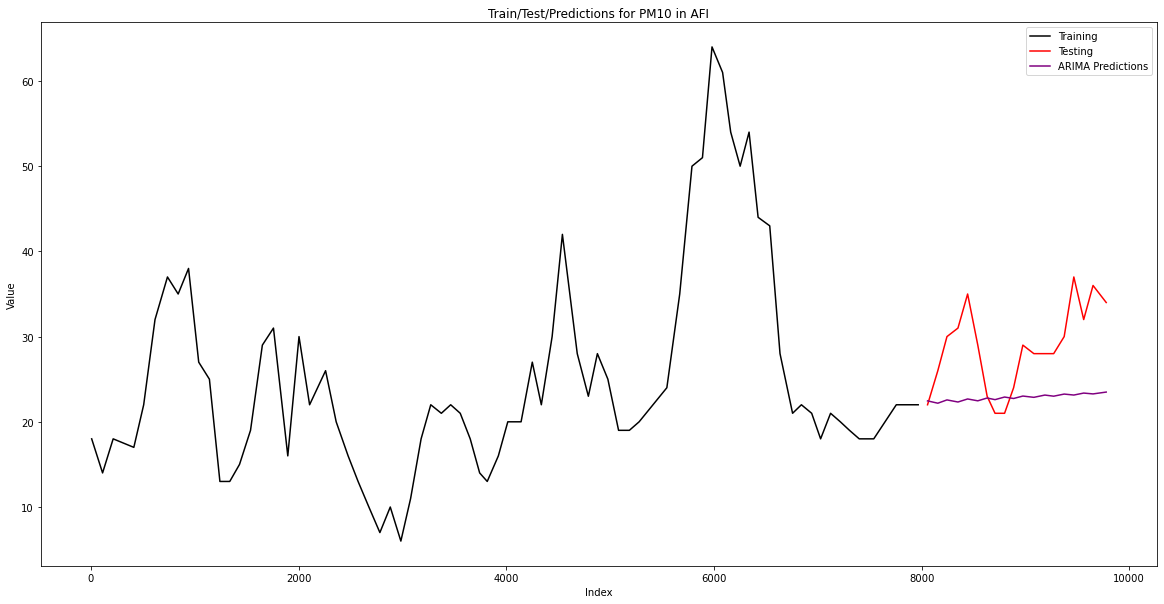

RMSE:  7.407728621220632


In [36]:
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
train = pm10_afi[pm10_afi.index < 8000]
test = pm10_afi[pm10_afi.index >= 8000]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in AFI")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_AFI_ARIMA_Prediction.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Pred

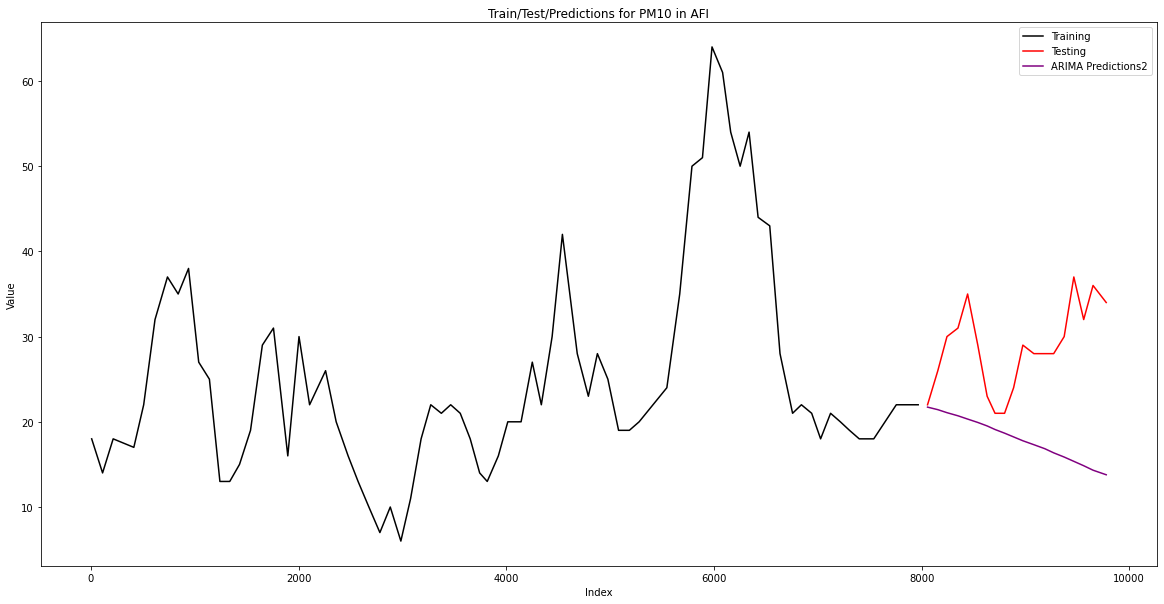

RMSE:  12.355223934399707


In [37]:
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
train = pm10_afi[pm10_afi.index < 8000]
test = pm10_afi[pm10_afi.index >= 8000]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,3,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in AFI")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend()
plt.savefig('plots_updated/PM10_AFI_ARIMA_Prediction2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to 

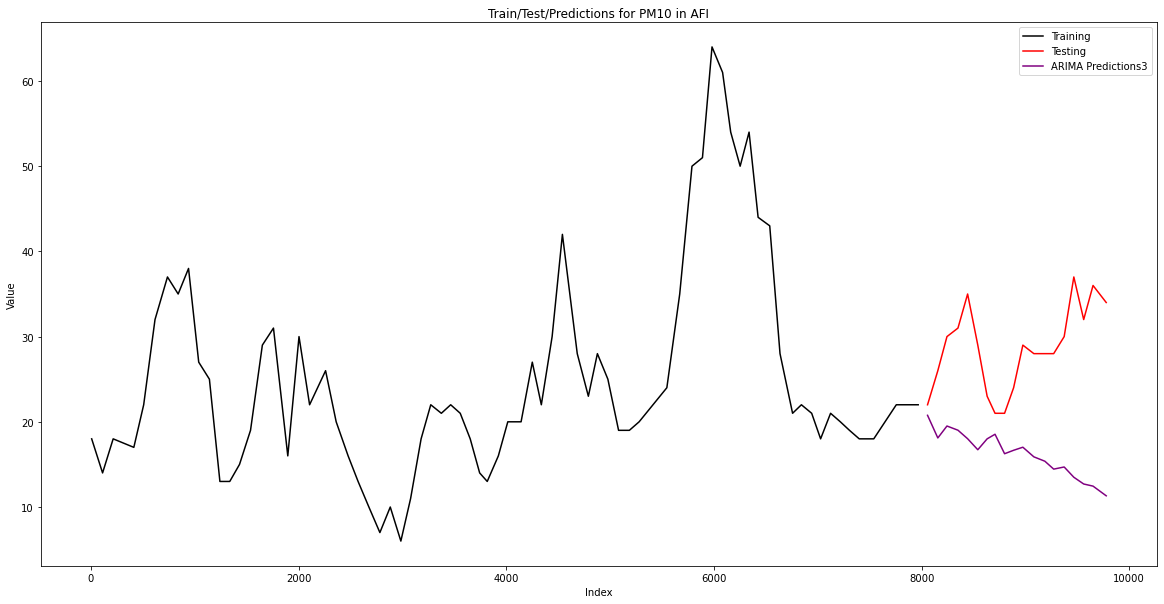

RMSE:  14.00422546066787


In [38]:
pm10_afi = pm10[pm10.get('LocationName') == 'AFI']
train = pm10_afi[pm10_afi.index < 8000]
test = pm10_afi[pm10_afi.index >= 8000]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(9,3,6))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in AFI")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
plt.legend()
plt.savefig('plots_updated/PM10_AFI_ARIMA_Prediction3.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse3 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse3)